# Generative modeling ...

... is general name for artificial intelligence, statistical methods, and machine learning algorithms that are used to create representations or abstract representations of observed phenomena or target variables, which can be inferred from collected data.

This approach is integral to unsupervised machine learning, as it facilitates the interpretation of data, allowing computers to comprehend real-world. This AI understanding can be used to predict all manner of probabilities on a subject from modeled data.

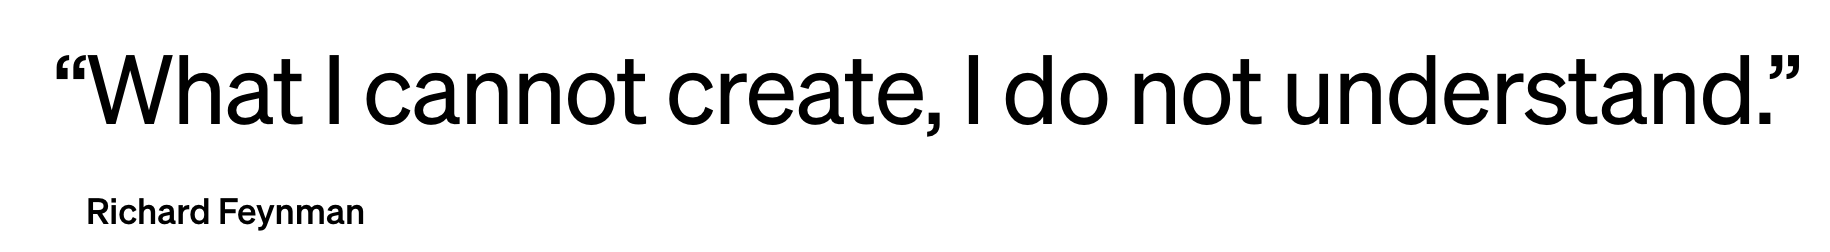

## Generative vs Discriminative

**Generative Models**:
Generative models aim to understand how data is generated by estimating the joint probability distribution $p(X, Y)$ of input features $X$ and output labels $Y$, or just $p(X)$ if there are no labels. They are versatile and can be used for data generation and imputing missing data.

**Discriminative Models**:
Discriminative models, on the other hand, focus on modeling the conditional probability  $p(Y | X)$ of output labels $Y$ given input features $X$. They aim to learn the decision boundary that separates different classes and are primarily used for classification tasks.

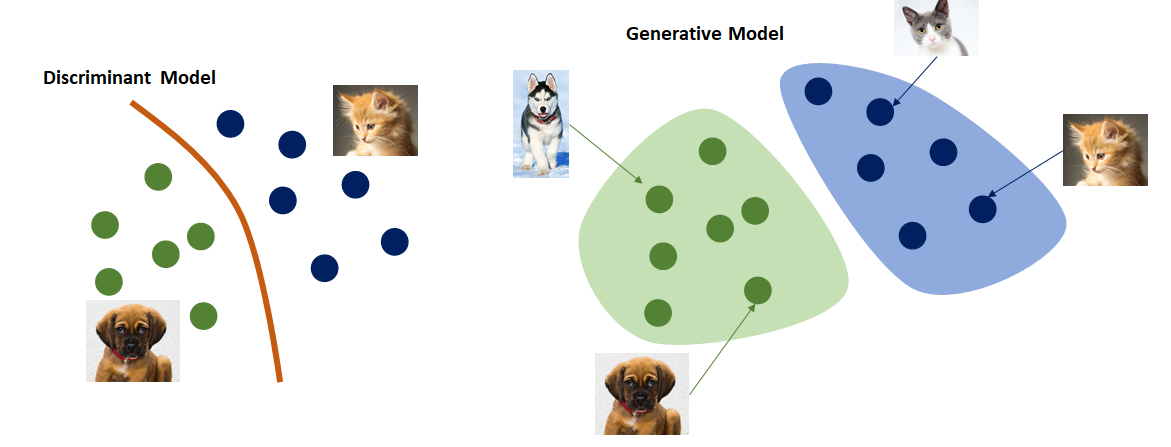

A generative model includes the distribution of the data itself, and **tells you how likely a given example is**. For example, models that predict the next word in a sequence are typically generative models  because they can assign a probability to a sequence of words.

A discriminative model ignores the question of whether a given instance is likely, and just tells you how likely a label is to apply to the instance.


**The Generative Modeling Framework**

* We have a dataset of observations $X$.

* We assume that the observations have been generated according to some unknown distribution, $p_{data}$.

* A generative model $p_{model}$  tries to mimic $p_{data}$. If we achieve this goal, we can sample from $p_{model}$ to generate observations that appear to have been drawn from $p_{data}$.

* We are impressed by $p_{model}$ if:

    * Rule 1: It can generate examples that appear to have been drawn from $p_{data}$.

    * Rule 2: It can generate examples that are suitably different from the observations in $X$. In other words, the model shouldn’t simply reproduce things it has already seen.



Generative models tackle a more difficult task than analogous discriminative models. **Generative models have to model more.**

A generative text model might need to understand intricate language nuances, such as word associations, grammar, and context. For instance, it should be able to infer that in the sentence *"The cat sat on the ___,"* the blank is likely to be filled with a noun, and it should consider contextual cues to predict what that noun might be. These complexities make generating text a demanding task for generative models.


# Generative tasks at NLP

source: https://medium.com/innerdoc/nlp-tasks-for-source-data-loading-group-1-a73256aa6b51
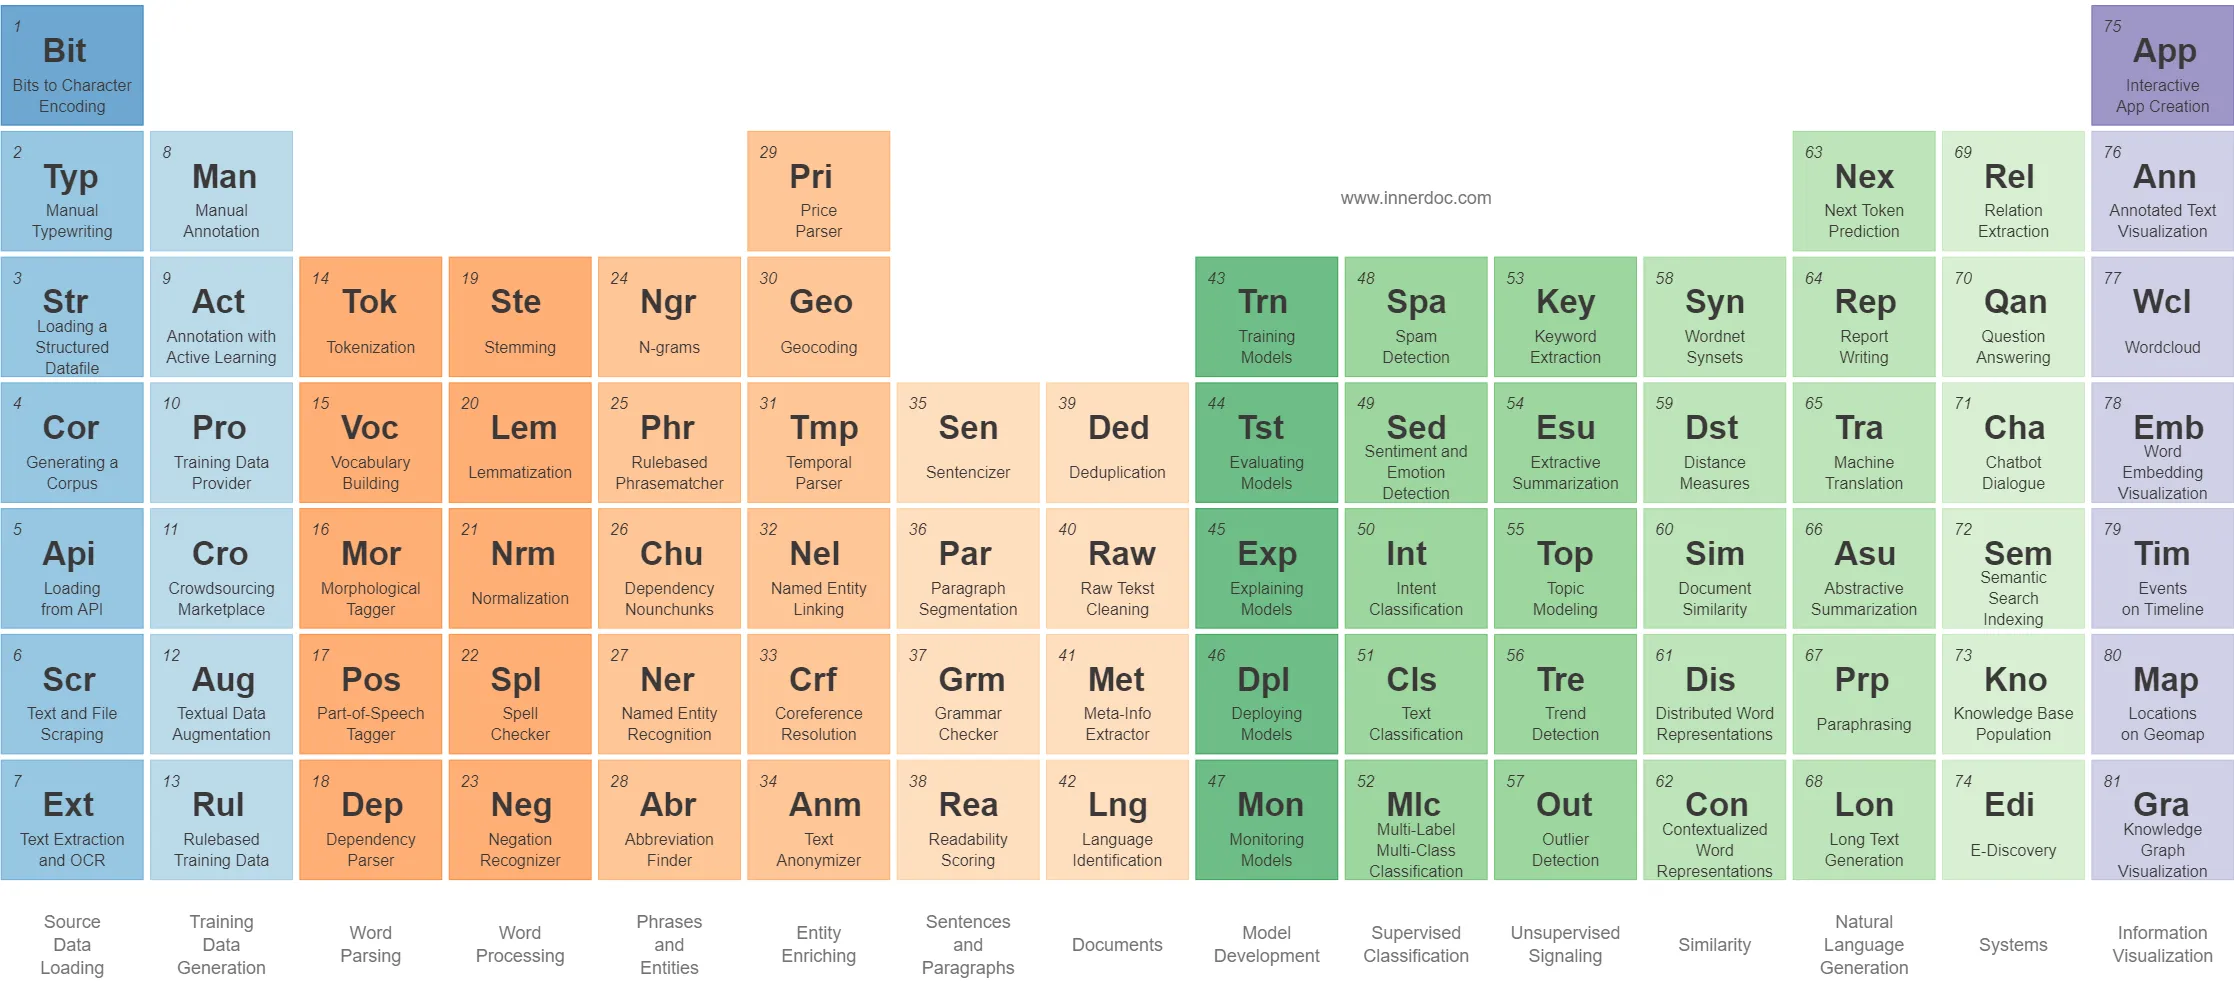


Generative tasks in Natural Language Processing (NLP) refer to a class of language processing problems where the goal is to generate human-like text, often in the form of sentences, paragraphs, or documents. These tasks involve the creation of text that is contextually relevant, coherent, and, ideally, indistinguishable from text produced by humans.

Generative tasks are a fundamental and versatile aspect of NLP, as they enable machines to not only understand and interpret human language but also to produce it. Here are some key generative tasks in NLP:

### Next Token Prediction

It involves predicting the next word or character in a sequence of text given the preceding context. The language model will receive input tokens and will predict the next token. From an abstract point of view, predicting the next token is a multi-class classification task where there are many classes (50,257 classes for GPT-2 since these are all the possible tokens).

![next_token_gen.png](images/next_token_gen.png)

To make next token predictions, models often employ techniques like greedy search, beam search (which explores multiple potential continuations) and sampling (which randomly selects tokens with probabilities determined by the model). These techniques balance between generating coherent text and introducing diversity in output.


### Text Generation
This task involves generating text, which can be used for various applications, such as content creation, chatbots, and creative writing. Text can be generated from scratch or be conditioned on specific input.

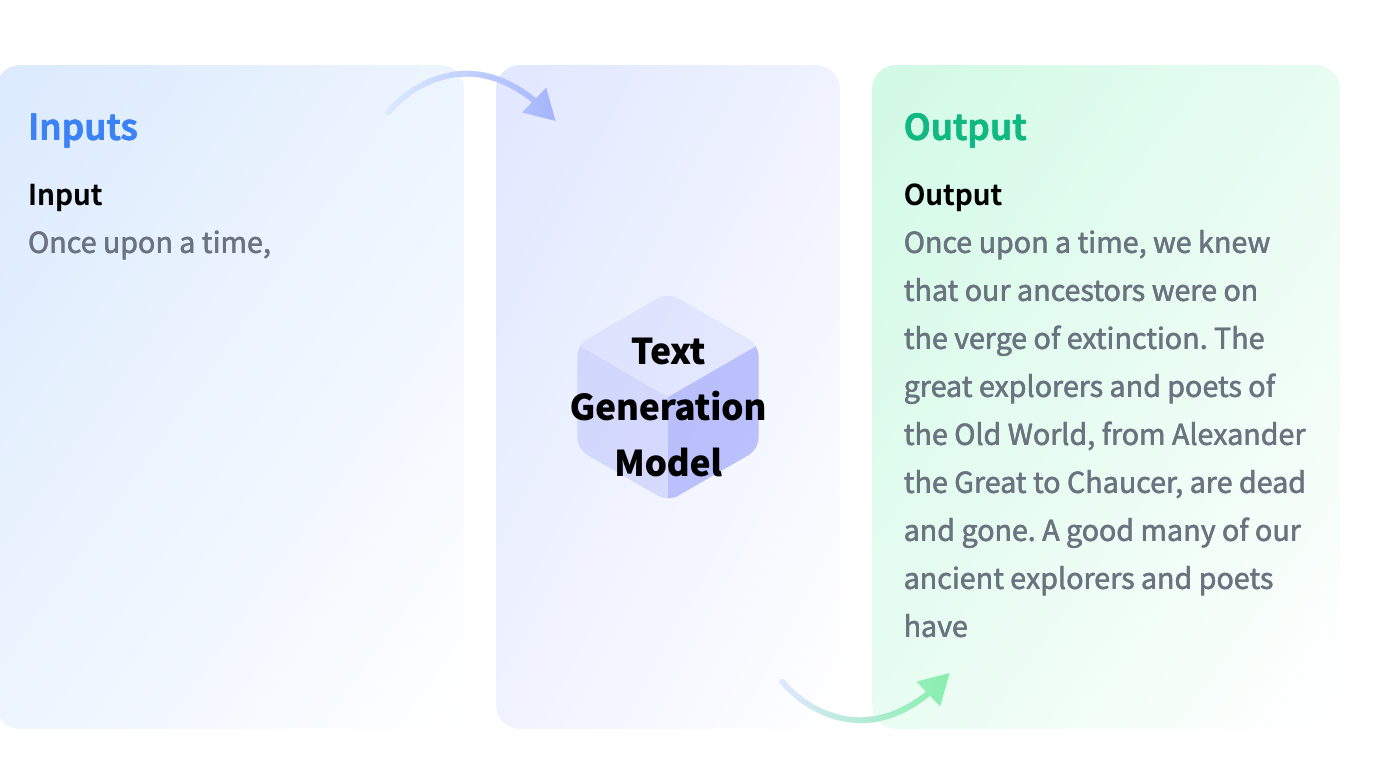

### Machine Translation
Generative models are used to automatically translate text from one language to another, enabling cross-lingual communication and content localization.

Machine Translation models, especially modern neural machine translation systems, operate by generating translations word by word or subsequence by subsequence, effectively predicting the next token based on the context established by the preceding words. This contextual prediction aligns with the fundamental principles of generative modeling, where the aim is to create text that is coherent, contextually relevant, and reflective of the source content.

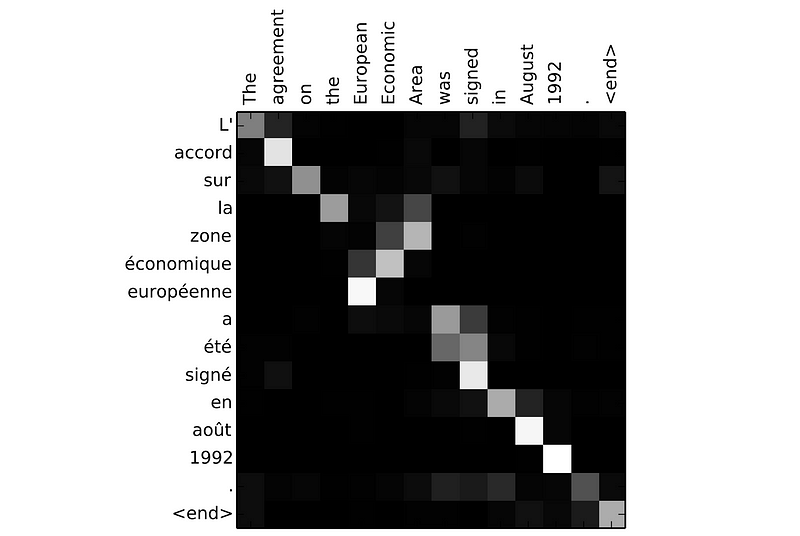

### Summarization
Automatic text summarization involves generating concise and coherent summaries of longer documents. This  involves generating a concise and coherent summary of a given text while interpreting and paraphrasing its content. Unlike extractive summarization, which selects and compiles existing sentences or phrases from the source text, abstractive summarization aims to create summaries in a more human-like manner. 

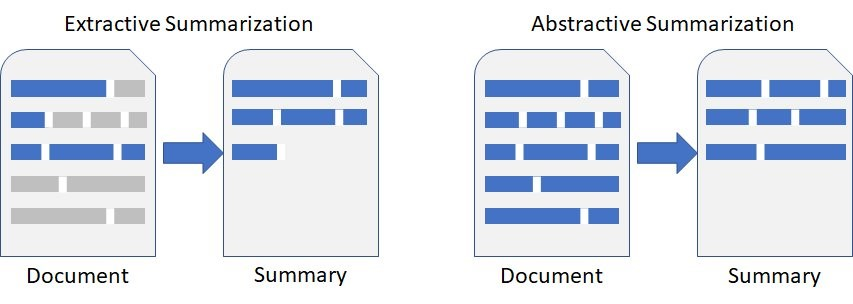

### Report Writing

Writing sentences based on structured data is also called Data-to-Text Generation. The task is to generate content without explicitly modelling what to say and in what order. The task can exist of two steps. The first step is to define what parts of the structured data should have the most attention and in what sequence they should occur. The second step is to generate the content, while taking the first step into account.
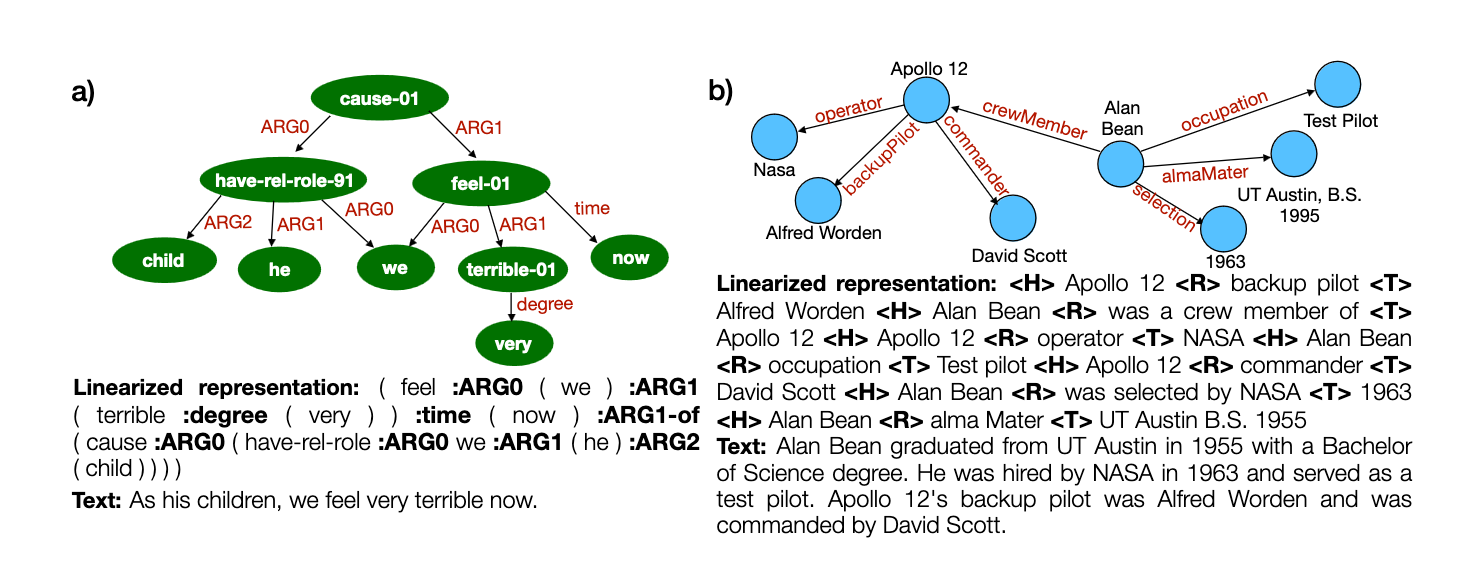

### Paraphrasing

Paraphrasing is the task of expressing the meaning of a source text into a new text by using different words and maintaining the semantic meaning. The goal might be to achieve greater clarity, to prevent plagiarism or to do data augmentation by generating related-but-different training data.

### Text style transfer

A task that focuses on changing the style or attributes of a given text while preserving its original content and meaning. This process involves transforming the text in terms of attributes like sentiment, formality, politeness, or even genre, all while maintaining the fundamental message conveyed by the source text.

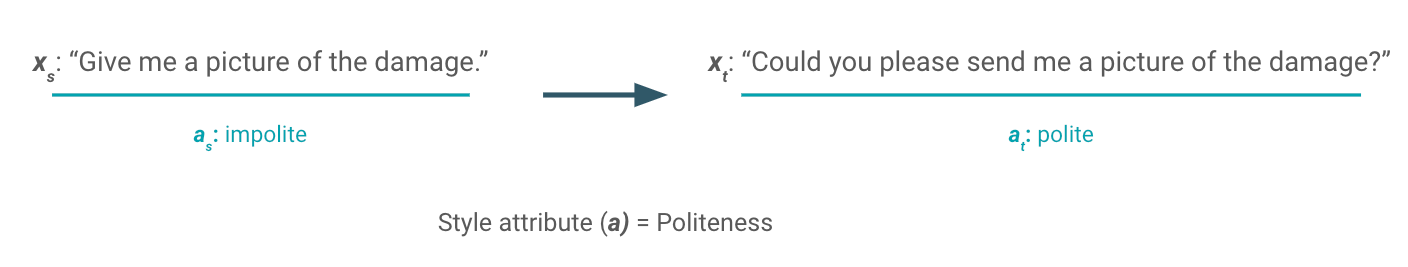

---
# Theoretical Background: GPT

> **Explore**: Very well detailed video about GPT from scratch: https://www.youtube.com/watch?v=kCc8FmEb1nY   
> Thanks @Andrii Shevtsov for the link

---
**Generative pre-trained transformers (GPT)** models, including [GPT-1](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf), [GPT-2](https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), and [GPT-3](https://arxiv.org/pdf/2005.14165.pdf), are **decoder-only** Transformer models. In the original ["Attention is All You Need" paper](https://arxiv.org/pdf/1706.03762.pdf) that introduced the Transformer architecture, the model was presented as an encoder-decoder architecture. However, in the case of GPT models, the encoder component is omitted, and only the decoder stack is used.


### Auto-regressive generation

Approach when model generates text or language sequentially, word by word or token by token, with each word being dependent on the preceding words in the sequence is called auto-regressive. This approach is "auto-regressive" because the model uses its own previously generated words as context to predict and generate the next word. 

Auto-regressive language generation is based on the assumption that the probability distribution of a word sequence can be decomposed into the product of conditional next word distributions:
$$\large P(w_{1:T}|W_0) = \prod_{t=1}^T P(w_t|w_{1:t-1}, W_0),\;with\;w_{1:0}=∅$$

and $W_0$ being the initial context word sequence.

The length $T$ of the word sequence is usually determined on-the-fly and corresponds to the timestep $t=T$ the `<EOS>` token is generated from $P(w_t|w_{1:t-1}, W_0)$.

![ar](images/text-gen-diagram.png)


The GPT model is performing autoregressive text generation. In this context, they operate solely as decoders, producing text one word at a time based on the preceding context. This makes them well-suited for tasks like text completion, text generation, and natural language understanding.

### Decoder block

Subsequent to the original paper, [Generating Wikipedia by Summarizing Long Sequences](https://arxiv.org/pdf/1801.10198.pdf) proposed another arrangement of the transformer block that is capable of doing language modeling. This model threw away the Transformer encoder. For that reason, let’s call the model the “Transformer-Decoder”. This early transformer-based language model was made up of a stack of six transformer decoder blocks. These blocks were very similar to the original decoder blocks, except they did away with that second self-attention layer. GPT model uses these decoder-only blocks.

![decoder](images/decoder_gpt.png)


### Intuitive difference between BERT and GPT:
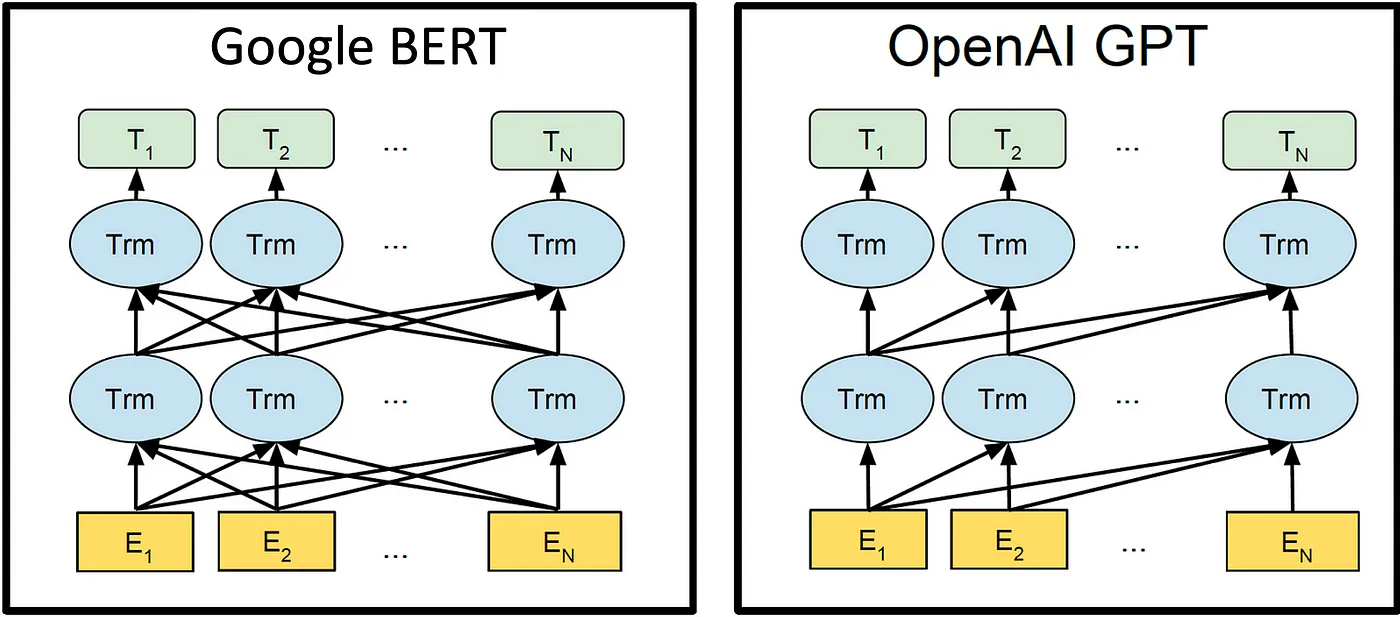

### How GPT works

**Example**: The most straightforward method to utilize a pre-trained GPT-2 model involves letting it generate text independently, referred to as "generating unconditional samples." Alternatively, we can provide a specific prompt to the model, directing it to produce content related to a particular subject, known as "generating interactive conditional samples." In the case of independent text generation.

* The model only has one input token, so that path would be the only active one. The token is processed successively through all the layers, then a vector is produced along that path.

* The embedding of the start token `|endoftext|` is looked up in the embedding matrix. Before handing that to the first block in the model, we need to incorporate positional encoding.

* Each block processes the token by using self-attention and a neural network layer. Once processed, the resulting vector is sent to the next block in the stack. Although the process is the same in each block, they have their unique weights for self-attention and neural network sublayers.
* When the top block in the model produces its output vector (the result of its own self-attention followed by its own neural network), the model multiplies that vector by the embedding matrix.

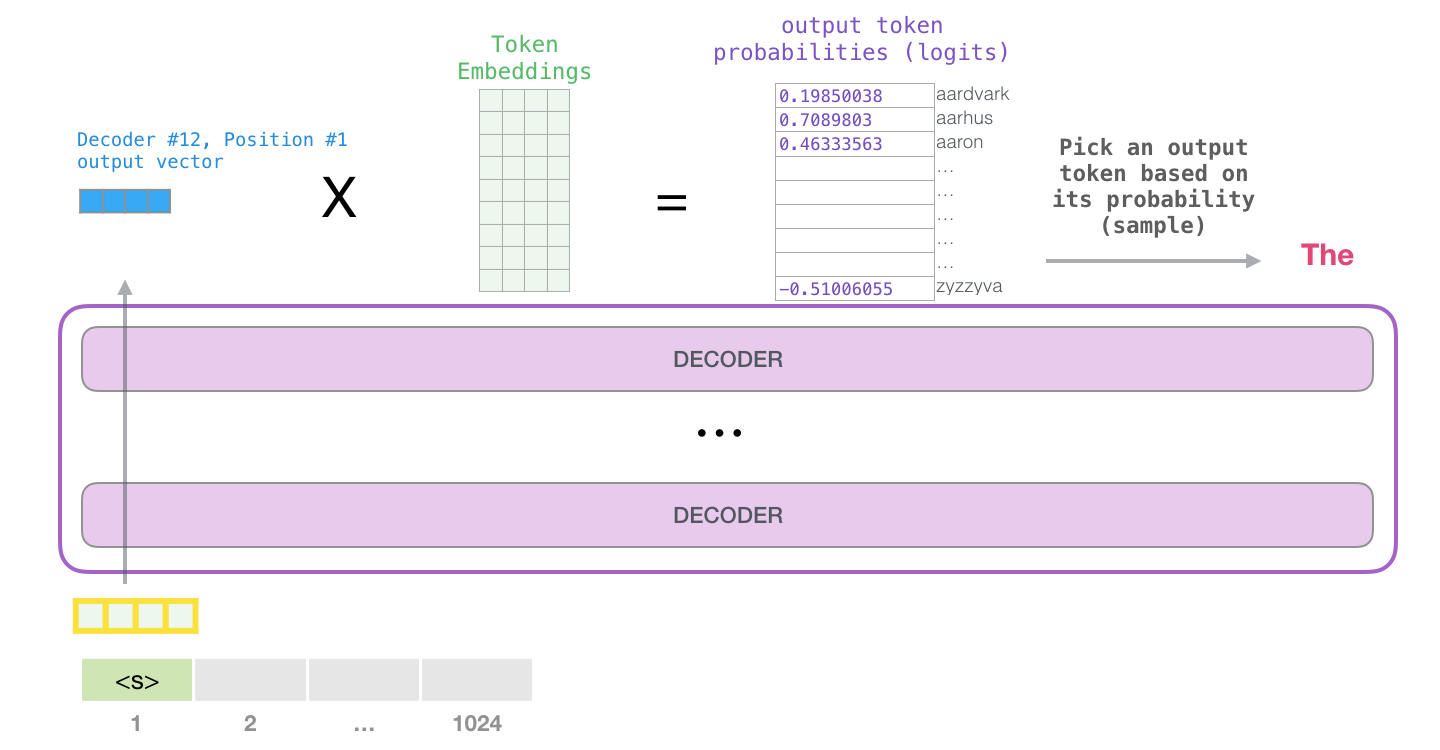

* We can simply select the token with the highest score (top_k = 1). But better results are achieved if the model considers other words as well.
* With that, the model has completed an iteration resulting in outputting a single word, which is added to the sequence.

The model continues iterating until the entire context is generated (1024 tokens for GPT-2) or until an end-of-sequence token is produced.

### Ways of selecting tokens
#### Greedy search

Greedy search is the simplest decoding method. It selects the word with the highest probability as its next word $w_t=argmax_w P(w∣w_{1:t−1})$ at each timestep $t$.

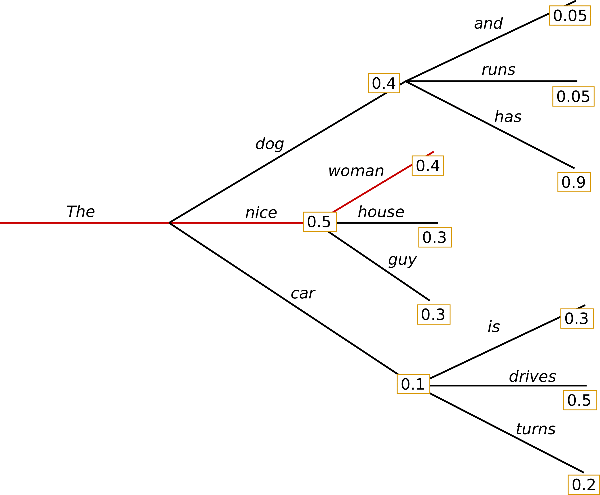

The major drawback of greedy search though is that it misses high probability words hidden behind a low probability word as can be seen in our sketch above:

#### Beam search
> **TODO**: read about beam search algorithm.

Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. Let's illustrate with num_beams=2:  
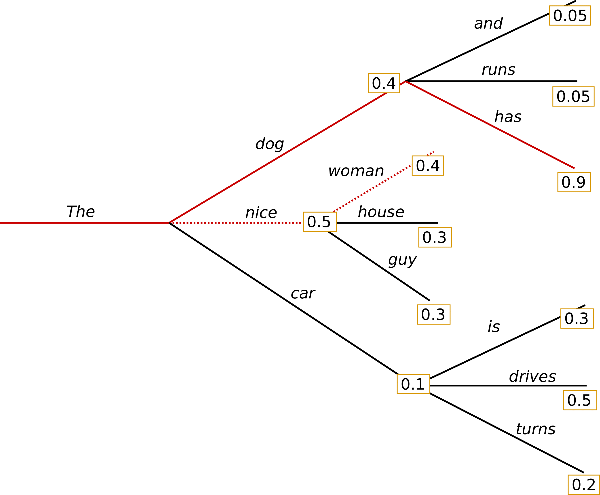

Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output.

**BUT**

In open-ended generation, a couple of reasons have been brought forward why beam search might not be the best possible option:
1. Beam search can work very well in tasks where the length of the desired generation is more or less predictable as in machine translation or summarization - see [Murray et al. (2018)](https://arxiv.org/abs/1808.10006) and [Yang et al. (2018)](https://arxiv.org/abs/1808.09582). But this is not the case for open-ended generation where the desired output length can vary greatly, e.g. dialog and story generation.
2. Beam search heavily suffers from repetitive generation,but less then gready search. It can be controlled by using *n-gram penalties*, such as setting the probability of next words that could create an already seen n-gram to 0. But for many tasks it is still hard to do, for example in story generation, since finding a good trade-off between inhibiting repetition and repeating cycles of identical n-grams requires a lot of finetuning.
3. High quality human language does not follow a distribution of high probability next words. In other words, as humans, we want generated text to surprise us and not to be boring/predictable. 

#### Sampling

Sampling means randomly picking the next word $w_t$ according to its conditional probability distribution:

$$\large w_t∼P(w ∣ w_{1:t−1})$$

We can further improve this by modifing the pool of words we use for it, or by weighting the probabilities of words.

> **TODO**: read about *temprature* for [softmax](https://en.wikipedia.org/wiki/Softmax_function#Smooth_arg_max) function.

Commonly,Top-K sampling is performed:

1. The language model generates a probability distribution over the entire vocabulary for the next token in the sequence.

2. It ranks the tokens by their probabilities in descending order.

3. It identifies the top-k tokens with the highest probabilities. "k" is a predefined threshold that determines how many tokens to consider.

4. The model randomly samples from this set of top-k tokens to choose the next token in the sequence.

The top-k sampling method ensures that the next token is chosen from a restricted set of possibilities, which can be especially useful in text generation to control the output's quality and coherence. It balances between deterministic (by selecting only the top-k tokens) and more random (by allowing some variability in the selected token) generation.

#### Example with K=6:
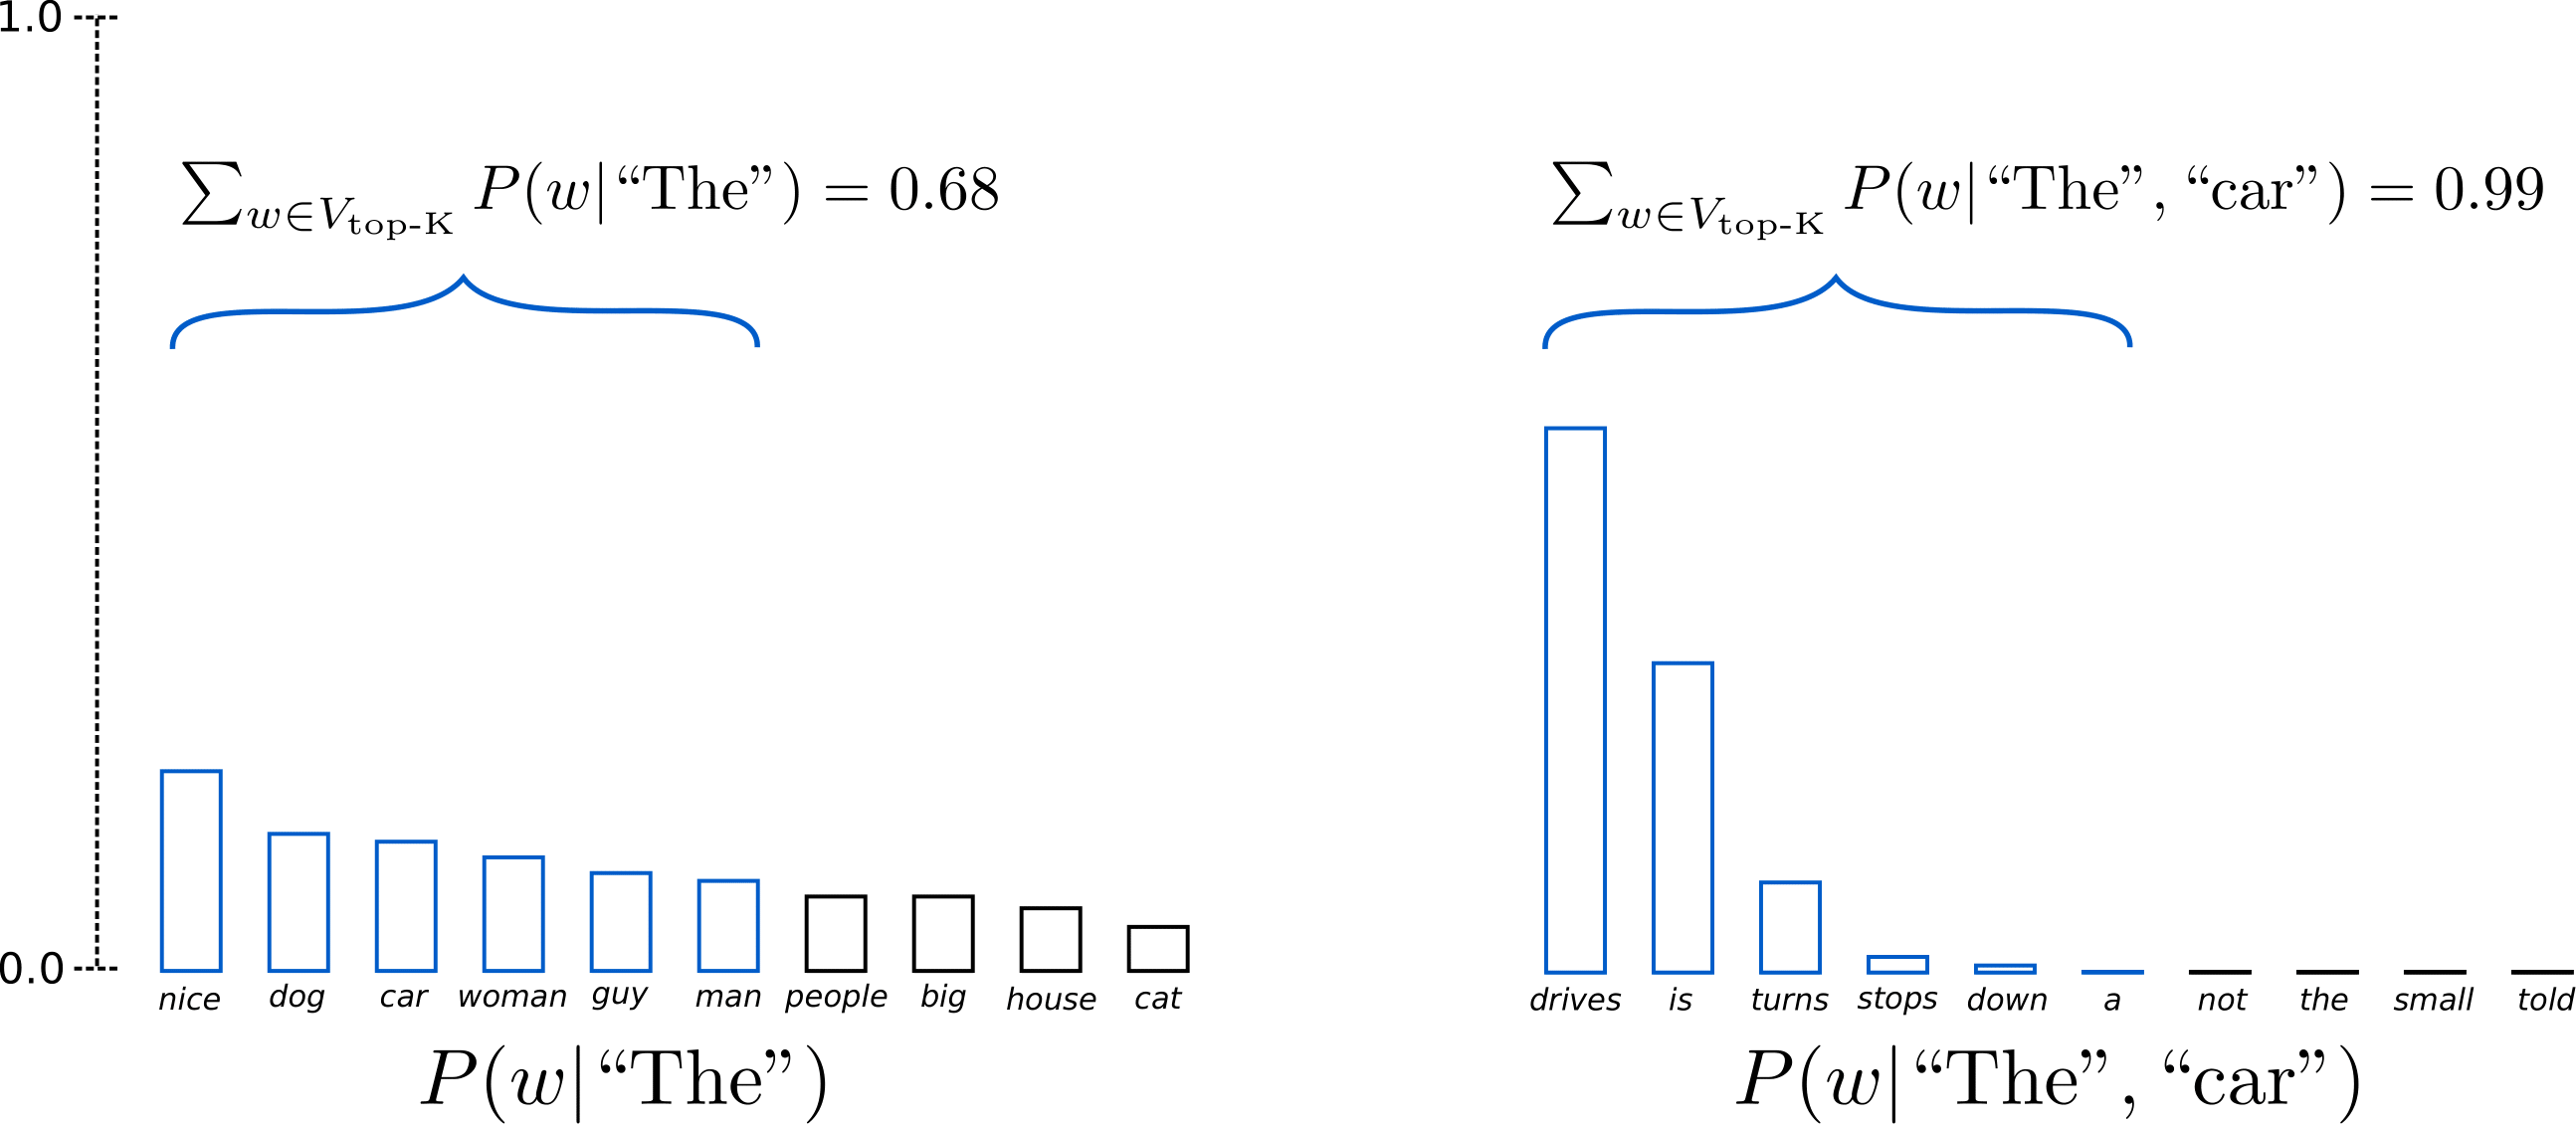

> **TODO**: read about top-p (nucleus) sampling.

# Evolution of GPT: Model Scaling

Here are the key differences between GPT-1, GPT-2, and GPT-3:

**Model Size:**

* GPT-1: GPT-1 is a smaller model with around 117 million parameters.
* GPT-2: GPT-2 is a large model, available in several different sizes with the largest having 1.5 billion parameters.
* GPT-3: GPT-3 is considerably larger, with its largest version having a whopping 175 billion parameters, making it one of the largest publicly known language models.

**Data and Pre-training:**

* GPT-3: GPT-3 was pre-trained on an even more extensive and diverse dataset compared to GPT-2. It has access to a vast amount of text data from the internet, allowing it to capture a broader range of language patterns and knowledge.
* GPT-1 and GPT-2 had access to different datasets but are smaller in scale compared to GPT-3.

**Fine-tuning:**

* All three models can be fine-tuned on specific tasks, but GPT-3's scale and performance make it more versatile and powerful in fine-tuned applications.

**Performance:**

* GPT-3: GPT-3 significantly outperforms GPT-2 in terms of natural language understanding and generation. It excels in a wide range of NLP tasks, from text completion to translation, and it often achieves state-of-the-art results on various benchmarks.
* GPT-1 and GPT-2 have their respective performance levels, but GPT-3 surpasses both in most NLP tasks.

**Applications:**

* GPT-3 is designed for a wide array of natural language processing tasks, including text generation, language translation, question answering, and much more. Its versatility makes it suitable for many practical applications.
* GPT-1 and GPT-2 are also capable language models, but they may not perform as well as GPT-3 across such a broad spectrum of tasks.

In summary, GPT-3 represents a significant advancement over GPT-1 and GPT-2 in terms of model size, performance, and versatility. Its larger scale and improved training data make it a more powerful tool for various natural language understanding and generation tasks.

# InstructGPT

Making language models bigger does not inherently make them better at following a user’s intent. For example, large language models can generate outputs that are untruthful, toxic, or simply not helpful to the user. For that, OpenAI utilized different fine tuning to get better results on diffent tasks and called those models InstructGPT.

**Main idea:**
Human reviewers rank model responses, and the models are fine-tuned based on this feedback. The method is called **Reinforcement Learning from human feedback**.
 
## Reinforcement learning
Reinforcement Learning (RL) is a machine learning paradigm that focuses on training agents to make sequences of decisions in an environment to maximize a cumulative reward. It's a type of learning where an agent learns to interact with its environment through a trial-and-error process, aiming to find an optimal strategy or policy that yields the most significant long-term rewards.

Key components of reinforcement learning include:

1. **Agent**: The learner or decision-maker that interacts with the environment. It makes decisions or takes actions to achieve its objectives.

2. **Environment**: The external system or context in which the agent operates. The agent's actions influence the state of the environment, and the environment provides feedback to the agent in the form of rewards and state changes.

3. **State ($s$)**: A representation of the current situation or configuration of the environment. The state captures all relevant information needed for decision-making.

4. **Action ($a$)**: The set of possible moves or decisions that the agent can take in a given state. Actions can have various consequences and influence the subsequent state.

5. **Reward ($r$)**: A numerical signal provided by the environment to indicate the immediate benefit or cost associated with an action taken in a particular state. The agent's objective is to maximize the cumulative reward over time.

6. **Policy ($π$)**: The strategy or mapping that defines how the agent selects actions in different states. A policy can be deterministic or stochastic.

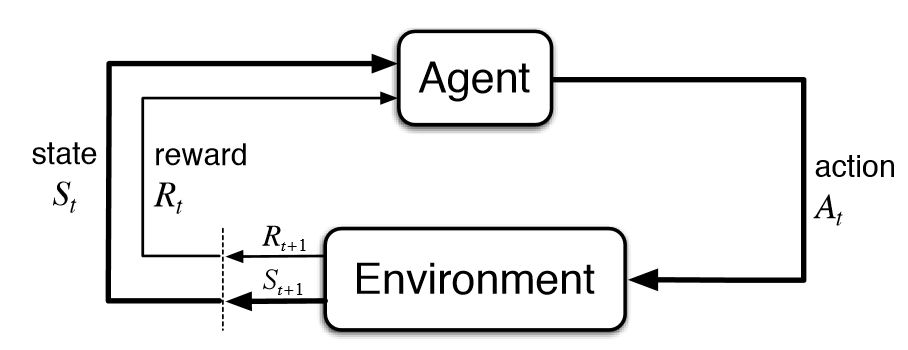

#### Markov Descision process example:
Recall that the agent makes a decision at times determined by external events (or by other parts of the robot's control system). At each such time the robot decides whether it should (1) actively search for a can, (2) remain stationary and wait for someone to bring it a can, or (3) go back to home base to recharge its battery. Suppose the environment works as follows. The best way to find cans is to actively search for them, but this runs down the robot's battery, whereas waiting does not. Whenever the robot is searching, the possibility exists that its battery will become depleted. In this case the robot must shut down and wait to be rescued (producing a low reward).  

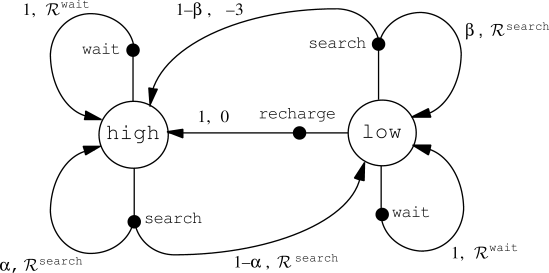

## Reinforcement Learning from human feedback

[Reinforcement Learning from Human Feedback (RLHF)](https://arxiv.org/pdf/1909.08593.pdf) is a machine learning approach that combines reinforcement learning with human feedback to train or fine-tune models. It's a technique that leverages human expertise to improve the performance of AI models, especially in cases where the model's initial behavior may not align with desired outcomes or where creating a reward model is challenging.

For the GPT case, to get ChatGPT and other InstructGPT models, the following scheme was used:

### Step 1: Supervised Fine-tuning of GPT-3.5
In the first step, a prompt dataset is formed which consists of prompts from various domains. Then we take a prompt one by one and provide it to a labeler that will figure out the most desirable output for that prompt. Then the prompts and these human labels are combined to form a new dataset which is used by pre-trained GPT-3.5 for fine-tuning. This helps the model in learning what kind of outputs humans expect and desire.

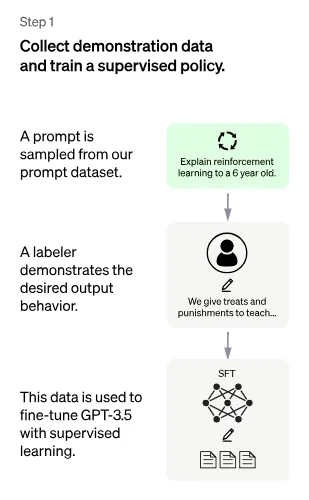

### Step 2: Training a Reward model
In the second step, we provide the language model with a prompt and extract several outputs from it. After the model has produced multiple outputs, a labeler will fill out a form shown below for each output. The labeler will give a rating to the output and answer a few categorical questions. These categorical questions tell what was wrong with the output. 

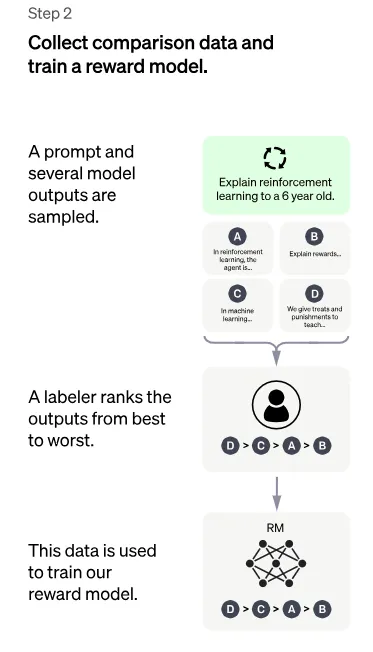

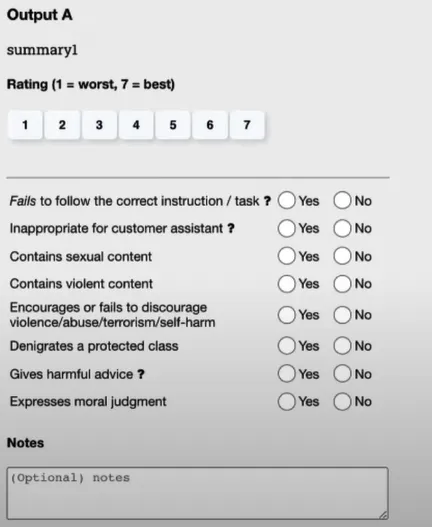

All these labels and responses from the model are now used to train a rewards model. The reward model will take two responses from one prompt and calculate a reward r for each response. The loss function for this model is calculated based on human labels and rewards assigned by the reward model. If the first response is better i.e. reward is more for the first response then the loss will be low but if the second response is better then loss will be high.

### Step 3: Updating policy using PPO
In the third step, we input a new prompt to the fine-tuned GPT-3.5 obtained from the first step. This model will generate a response for this prompt. We will take this prompt and response, and use it as input to our trained Reward model from the second step. The reward model will a reward value to the response. We will use this reward to train our fine-tuned GPT-3.5. The model has to learn to maximize the reward value.

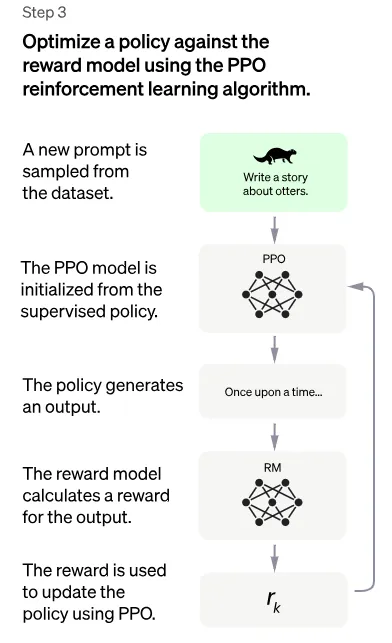

The fine-tuned GPT-3.5 is updated by using the reward form reward model. The model is updated with the help of Proximal policy optimization. The goal of PPO is to maximize the total reward of responses generated from the model by including reward in the loss.

# Hands-On: Training a Small GPT Model

In [1]:
text = """Tell me about your home. The one who remembers your first faltering steps and preserves the annual notches of time left by your mother's hand on the door.
Tell me about its smell - the warm sleepy spirit of bookshelves, a credenza battered with shachel, yellow soup with astringent parsley. Or, perhaps, on the contrary - the cheerful fragrance of paint, varnish, novelty; how long, if not half my life, I dreamed of my own home!
Tell about his creaks and rustles, shadows and light-filled rooms, carefree laughter or cracked voices that suddenly spoke in a low voice that, probably, nothing would be the same again.
Furrowed, scarred, with cross-glued windows, your house, defenseless during a great calamity, now tries with all its might to be a fortress: somewhere in its bowels - in a dark, uncomfortable basement - people and domestic animals often hide from shelling.
And sometimes the house can fit into the size of a suitcase. All of us now, like those snails, know the price of large migrations.
But the main thing is the place of power and memory of the family. Your predecessors, who were ground by the millstones of the dark times, drew strength from it - wars, repressions, the struggle with the two-headed hydra. They were broken, and they fought for the right to survive and keep their home within themselves. That's how we are now.
I know for sure, he will stand up, fight it out, wait for your excited exclamation: "I'm home!". And you will tell me about everything."""

with open('path_to_your_training_data.txt', 'w') as f:
    f.write(text)


In [9]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

device = "cuda" if torch.cuda.is_available() else "cpu"


# Set your model and tokenizer name
model_name = "gpt2"  # You can use other variants like "gpt2-medium", "gpt2-large" etc
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Load fine-tuning dataset
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="path_to_your_training_data.txt",  # Replace with your dataset
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./output",
    overwrite_output_dir=True,
    num_train_epochs=50,
    per_device_train_batch_size=64,
    learning_rate=1e-3,
    report_to='none',
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# Start training
trainer.train()

TrainOutput(global_step=50, training_loss=0.2696212387084961, metrics={'train_runtime': 3.7742, 'train_samples_per_second': 26.496, 'train_steps_per_second': 13.248, 'total_flos': 6532300800000.0, 'train_loss': 0.2696212387084961, 'epoch': 50.0})

In [10]:
# You can now use the fine-tuned model for text generation and other tasks
# Set the seed for reproducibility
torch.manual_seed(42)

# Generate text
prompt = "Once upon a time"  # You can change the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
output = model.generate(input_ids, max_length=100, num_return_sequences=1, top_k=50)

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time left by your mother's hand on the door.
Furrowed, scarred, with cross-glued windows, your house, defenseless during a great calamity, now tries with all its might to be a fortress: somewhere in its bowels - in a dark, uncomfortable basement - people and domestic animals often hide from shelling.
And sometimes the house can fit into the size of a suitcase. All of us now, like those snails, know


# Summarization

> **TODO**: read about BART model

In [4]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

device = "cuda:0" if torch.cuda.is_available() else "cpu"

model_name="facebook/bart-large-cnn"

ARTICLE = """Summarize: Water on Mars has been a topic of immense interest and exploration, primarily due to its importance for potential future human missions and its significance in understanding the planet's history. Here's a 250-word text discussing how water can be found on Mars:
Water on Mars has long captivated the imagination of scientists and space enthusiasts alike. While the Red Planet's surface may seem arid and desolate, evidence suggests that water exists in various forms. Discovering water on Mars has far-reaching implications for future missions and our understanding of the planet's past.
One of the most compelling pieces of evidence for water on Mars is the presence of polar ice caps. These caps are primarily composed of water ice, which freezes out of the thin Martian atmosphere during the planet's cold winters. The polar ice caps' size and behavior vary with the changing seasons, offering a dynamic view of Martian water.
Mars also boasts extensive underground water ice. Radar data from spacecraft like the Mars Reconnaissance Orbiter have revealed subsurface ice deposits, often buried beneath a layer of dust and rock. These reservoirs could potentially serve as a vital resource for future human missions, offering drinking water and even a source of oxygen for life support systems.
Additionally, Martian geology provides clues about the planet's watery past. Dry riverbeds, deltas, and ancient lakebeds hint at a once-watery world, where liquid water flowed across the surface. These features suggest that Mars may have experienced a warmer, wetter climate in its distant past, making it a potential candidate for past habitability.
Water on Mars, in various forms, continues to be a focal point of scientific exploration and future colonization plans. Its existence fuels our curiosity about the planet's history and its potential to support human life. Understanding how water can be harnessed and utilized on Mars remains a pivotal part of our endeavors to explore the mysteries of the Red Planet.
"""

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

inputs = tokenizer(ARTICLE, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_new_tokens=80, do_sample=False)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Water on Mars has long captivated the imagination of scientists and space enthusiasts alike. While the Red Planet's surface may seem arid and desolate, evidence suggests that water exists in various forms. Discovering water has far-reaching implications for future missions and our understanding of the planet's past.


# Translation


> **TODO**: read about T5 model

In [8]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

model_name="sdadas/flan-t5-base-translator-en-pl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

text = "Learning generative modeling is cool and for sure not stresful. This model was finetuned already for Polish-English translation, so you don't have to start sentence with 'translate from...'"

inputs = tokenizer(text, return_tensors="pt").input_ids.to(device)
outputs = model.generate(inputs, max_new_tokens=256, do_sample=False)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Model generatywny jest fajny i na pewno nie rozciągliwy, ten model został już dopracowany do tłumaczenia polsko-angielskiego, więc nie trzeba zaczynać zdania od "tłumacz z..."


# Finetune advanced: LoRA

Many applications in natural language processing rely on adapting one large-scale, pre-trained language model to multiple downstream applications. Such adaptation is usually done via fine-tuning, which updates all the parameters of the pre-trained model. The ma jor downside of fine-tuning is that the new model contains as many parameters as in the original model. 

A neural network contains many dense layers which perform matrix multiplication. When fine tuning, we want to make some changes to the operation of this layer by fine-tuning the model, adjusting the weights by $ΔW$ (typically found using gradient descent), so that the new output is:

$$\large h` = W`x = (W_0 + ΔW)x = h + ΔWx$$

As we can see, the new y differs from the old one by $ΔWx$, which can be interpreted as the result of the operation of another separate fully connected layer.

It was showed, that big over-parametrized models in fact reside on a low intrinsic dimension. In [LoRA paper](https://arxiv.org/pdf/2106.09685.pdf) authors hypothesize that the change in weights during model adaptation also has a low “intrinsic rank”.

For a pre-trained weight matrix $\large W_0 ∈ \mathbb{R}^{d×k}$, we can constrain its update by representing the latter with a low-rank deomposition $\large W_0 + ∆W = W_0 + BA$, where $\large B ∈ \mathbb{R}^{d×r}$ , $\large A ∈ \mathbb{R}^{r×k}$, and the rank $\large r \ll min(d, k)$.
During training, $\large W_0$ is frozen and does not receive gradient updates, while $\large A$ and $\large B$ contain trainable parameters.

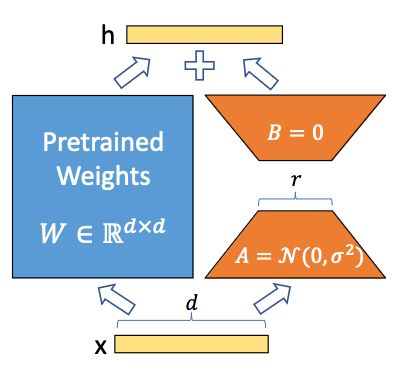

The advantages of this approach are as follows:

* **Significantly less resource-intensive fine-tuning**. Now, a model like GPT-3/LLaMA can be fine-tuned for specific tasks using less powerful and more available hardware.

* **Reduction in the number of trainable parameters**, which lowers the dataset requirements.

* LoRA models **take up significantly less disk space**. We can store one `'base'` model, which can indeed be large, and a large number of LoRA modules (fine-tunings for different languages, text summarization, text2text, other NLP tasks), which occupy very little space. This makes these models easier to store and distribute. For GPT-3 with 350 GB of weights, the $\large A$ and $\large B$ matrices for all linear layers combined took up only 35 MB!

* **No output delay**. Before using, we can calculate $\large W' = W + BA$, so the new model will require the same amount of computation as a model without fine-tuning.

* You can **change matrices A and B on-the-fly**, even in the middle of a conversation, by asking the user, for example, in which style they would like a response."

> **Advanced TODO**: Try running the following code and for finetuning using LoRA and tests if it works.

Example of fine tuning:

In [ ]:
!pip install -q bitsandbytes accelerate loralib datasets loralib 
!pip install -q git+https://github.com/huggingface/transformers.git@main git+https://github.com/huggingface/peft.git

In [ ]:
       
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import torch 
import torch.nn as nn 
import bitsandbytes as bnb 
from peft import prepare_model_for_kbit_training 


from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained( 
    "facebook/opt-125m",  
    load_in_8bit=True,  
    device_map='auto', 
)

tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")

#preapare model so we can do fine-tuning
model = prepare_model_for_kbit_training(model)

In [ ]:
def print_trainable_parameters(model): 
    """ 
    Prints the number of trainable parameters in the model. 
    """ 
    trainable_params = 0 
    all_param = 0 
    for _, param in model.named_parameters(): 
        all_param += param.numel() 
        if param.requires_grad: 
            trainable_params += param.numel() 
    print( 
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}" 
)

In [ ]:
from peft import LoraConfig, get_peft_model 

config = LoraConfig( 
    r=16, 
    lora_alpha=32, 
    target_modules=["q_proj", "v_proj"], 
    lora_dropout=0.05, 
    bias="none", 
    task_type="CAUSAL_LM" 
)

model = get_peft_model(model, config) 
print_trainable_parameters(model)

The `r` is the Lora attention dimension. It is set to `16`. The default is `8`.  
The `lora_alpha` is the alpha parameter for Lora scaling. It is set to `32`. The default is `8`.  
The `lora_dropout` is the dropout probability for Lora layers. The default is `0.0`. Here is set to `0.05` or 5%.  
The `bias` is the type of bias. It can be `“none”`, `“all”`, or `“lora_only”`. The default is `“none”`.  
The `task_type` is the type of model. Here we are using a causal language model so the value is `“CAUSAL_LM”`. If you are running a Sequence-Classification model, the value will be `“SEQ_CLS”`. If it is a Sequence-to-Sequence-Language-Model, the value will be `“SEQ_2_SEQ_LM”`. If it is a Token-classification model such as Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging, it should be `“TOKEN_CLS”`.  
The `target_modules` is the list of module names.  

In [ ]:
from datasets import load_dataset 
data = load_dataset("Abirate/english_quotes") 
data = data.map(lambda samples: tokenizer(samples['quote']), batched=True)

In [ ]:
import transformers

trainer = transformers.Trainer( 
    model=model,  
    train_dataset=data['train'], 
    args=transformers.TrainingArguments( 
        per_device_train_batch_size=4,  
        gradient_accumulation_steps=4, 
        warmup_steps=100,  
        max_steps=200,  
        learning_rate=2e-4,  
        fp16=True, 
        logging_steps=1,  
        output_dir='outputs' 
    ), 
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False) 
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!

trainer.train()

In [ ]:
batch = tokenizer("Two things are infinite: ", return_tensors='pt')

with torch.cuda.amp.autocast(): 
    output_tokens = model.generate(**batch, max_new_tokens=50)

print('\n\n', tokenizer.decode(output_tokens[0], skip_special_tokens=True))

> **Advanced TODO**: read about another approach for lightweight fine tuning: prefix tuning.

# Homework

Read about difference between GPT-3.5 and GPT-4.

Read about metrics for generarive NLP.

**Advanced**: Generative models are usually very big. Read about model quantization. That may help with inference of big models such as GPT.

**Theory** (5 points): Google form questions.

**Practical task** (10 points): 
1. Choose one:
    * Finetune transformer model for summarization on https://huggingface.co/datasets/samsum.
    * Finetune transformer model for translation on dataset of your choice.
2. Experiment with different prompts.
2. Based on a task you choose, choose a few metrics that are used in generative NLP (BLEU, ROUGE etc), test your finetune models using them, describe their pros and cons relative to the generations your model makes.

3. If you want, you can try use LoRA or prefix tuning for finetuning the model.